In [1]:
#1.import software pack
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,Flatten
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#2.load dataset and check shape
(x_train,y_train),(x_test,y_test)  = keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train = x_train.reshape((-1,28,28,1))/255.0
x_test = x_test.reshape((-1,28,28,1))/255.0
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


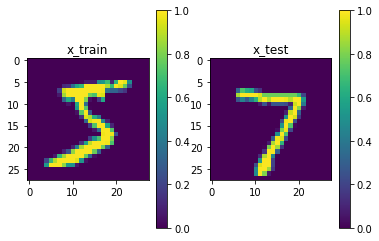

In [3]:
#3.present some image
x = np.arange(0,3*np.pi,0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)
plt.subplot(1,2,1)
plt.imshow(x_train[0].reshape((28,28)))
plt.title('x_train')
plt.colorbar()
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(x_test[0].reshape((28,28)))
plt.title('x_test')
plt.colorbar()
plt.grid(False)
plt.show()


In [4]:
#build model
cls_model = keras.models.Sequential([
                                    Conv2D(4,3, padding='same',activation='relu',input_shape=(28,28,1)),
                                    Flatten(),
                                    Dense(64,activation='relu'),
                                    Dense(10,activation='softmax')
                                    ])

cls_model.compile(optimizer='adam',
                 loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
cls_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 4)         40        
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                200768    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 201,458
Trainable params: 201,458
Non-trainable params: 0
_________________________________________________________________


In [5]:
# train the model 
history = cls_model.fit(x_train,y_train,batch_size=20,epochs=20,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 11s 219us/sample - loss: 0.2142 - accuracy: 0.9348 - val_loss: 0.1227 - val_accuracy: 0.9615
Epoch 2/20
48000/48000 [==============================] - 9s 190us/sample - loss: 0.0834 - accuracy: 0.9748 - val_loss: 0.0783 - val_accuracy: 0.9763
Epoch 3/20
48000/48000 [==============================] - 9s 179us/sample - loss: 0.0544 - accuracy: 0.9830 - val_loss: 0.0746 - val_accuracy: 0.9780
Epoch 4/20
48000/48000 [==============================] - 10s 217us/sample - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0754 - val_accuracy: 0.9789
Epoch 5/20
48000/48000 [==============================] - 11s 219us/sample - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0754 - val_accuracy: 0.9800
Epoch 6/20
48000/48000 [==============================] - 10s 218us/sample - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0844 - val_accuracy: 0.9784
Epoch 7/20
48000/48000 [======================

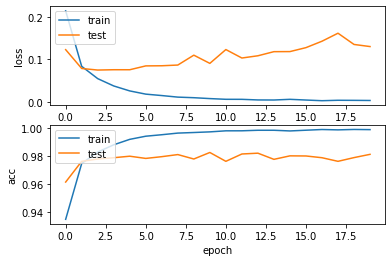

In [6]:
# show each epoch train result 
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
#evaluate the model
eval_loss,eval_acc  = cls_model.evaluate(x_test,y_test,verbose = 2)
print("eval loss is {},eval acc is {}".format(eval_loss,eval_acc))

10000/1 - 1s - loss: 0.0543 - accuracy: 0.9828
eval loss is 0.1086102051612987,eval acc is 0.9828000068664551


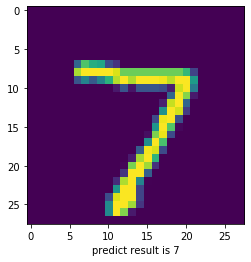

In [8]:
#predict new data and show the result
predict_result = cls_model.predict(x_test)
plt.xlabel('predict result is {}'.format(np.argmax(predict_result[0])))
plt.imshow(x_test[0].reshape((28,28)))